# Speed dating: **what are the triggers to match**?

The Speed dating networking application did provide us with a dataset containing lots of information about their users gathered from participants in experimental speed dating events from 2002-2004.

In this notebook we will explore **what are the triggers to match**.

# Content
- 1- High level expploration
    - 1-1 Number of persons, number of meets
    - 1-2 Completeness of ibformation gathered
- 2- Focus on matches
- 3- Are there any easy correlations between a match and any of the thematic gathered in the dataset?
- 4- Further investigations on age, ethnic/religious background
    - 4-1 Analusis on age
    - 4-2 Ethnic and religious background
        - 4-2-1 Ethnic background
        - 4-2-2 Religious background
        - 4-2-3 Combination ethnic and religious background
-5- What are people looking for?
    - 5-1 What is the goal of attendies?
    - 5-2 Centers of interests
    - 5-3 Expectations and self measure
        - 5-3-1 Expectations
        - 5-3-2 How do people mesure themselves on these criterias?
    - 5-4 Women's perception from others
- Conclusion

In [1]:
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

- Import dataset

In [2]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding="ISO-8859-1")

- Basic stats

In [3]:
# Basic stats
print("Number of rows, columns : {}".format(df.shape))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows, columns : (8378, 195)

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000



Percentage of missing values: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

- Many columns included in this dataset and it is difficult to see the kind and quality of information available
    - A high level exploration will be necessary
    - for each steps of the analysis, some of the columns will have to be picked to perform a proper analysis
- A lot of missing data on some of the columns => to be investigated further
- A person has a unique iid and participates to several dates, flaged by an id. Each analysis performed will have to be either at the person level (and then aggregating the data at iid level) or at dating level (and then using the id)

# 1- High level exploration

## 1-1 Number of persons, number of meets

In [4]:
persons = df["iid"].nunique()
dates = df["id"].nunique()

print(f"The data has been gathered on {persons} differents persons, each of them participated to up to {dates} differents meets")

The data has been gathered on 551 differents persons, each of them participated to up to 22 differents meets


## 1-2 Completeness of information gathered

We know from the dataset description that the data have been collected at several moments: at the moment of the event (on spot), after 1 day, after 4/5 weeks. 

Since some of the columns have a high level of missing information, let's have a look at the % of missing value and connect it with the moment of data gathering.

- Let's consider each column and add an indicator (status column) about the rate of missing information. All the columns where missing > 40% will be flagged "low_rate".

In [5]:
def missing_data(df): # Calculation of % missing values of each columns and status for missing data: "low_rate" if missing information > 40% of the rows.
    mis_val = df.isnull().sum() # Nb missing values
    in_values = df.notnull().sum() # Nb values populated
    mis_perc = 100*df.isnull().sum()/len(df) # % missing values
    miss_table = pd.concat([mis_val, in_values, mis_perc], axis=1) # concatenate all info
    miss_table = miss_table.rename(columns = {0 : 'nb missing values', 1 : 'nb populated data', 2:'% missing values'}) # rename columns
    miss_table["status"] = miss_table['% missing values'].apply(lambda x : "low_rate" if x > 40 else "rate_ok") # status of data quality (regarding missing values)
    miss_table2 = pd.concat([mis_val, in_values, mis_perc, miss_table["status"]], axis=1) # adding status to the dataframe created above
    miss_table2 = miss_table.rename(columns = {0 : 'nb missing values', 1 : 'nb populated data', 2:'% missing values', 3: "status"}) # rename columns
                                 
    return miss_table2

In [6]:
cleaning = missing_data(df)

- Let's add a flag on the time of collection (on spot, after 1 day or after 4-5 weeks):

In [7]:
# index of data collected on spot:
on_spot = cleaning.iloc[0:119,:].index
# index of data collected after 1 day:
day1 = cleaning.iloc[119:156,:].index
# index of data collected after 4-5 weeks:
month1 = cleaning.iloc[156:,:].index

In [8]:
# Adding this flag to the analysis of columns
cleaning["data_key"]= cleaning.index
cleaning["collect_date"] = cleaning["data_key"].apply(lambda x : "on_spot" if x in on_spot 
                                                          else "day1" if x in day1
                                                          else "month1")
cleaning.head()

,nb missing values,nb populated data,% missing values,status,data_key,collect_date
iid,0,8378,0.000000,rate_ok,iid,on_spot
id,1,8377,0.011936,rate_ok,id,on_spot
gender,0,8378,0.000000,rate_ok,gender,on_spot
idg,0,8378,0.000000,rate_ok,idg,on_spot
condtn,0,8378,0.000000,rate_ok,condtn,on_spot


- Let's have a look at the number of information flagged "rate_ok", and collection_date:

In [9]:
cleaning.groupby(["status", "collect_date"])["nb populated data"].count()

status    collect_date
low_rate  day1            11
          month1          39
          on_spot         21
rate_ok   day1            26
          on_spot         98
Name: nb populated data, dtype: int64

- Checking 2 very important columns to answer our problematic: "date_3" (Have you been on a date with any of your matches?) and "match" (did you have a match?)

In [10]:
cleaning_date_match = cleaning[(cleaning["data_key"] == "date_3") | (cleaning["data_key"] == "match")]
cleaning_date_match

,nb missing values,nb populated data,% missing values,status,data_key,collect_date
match,0,8378,0.000000,rate_ok,match,on_spot
date_3,4404,3974,52.566245,low_rate,date_3,month1


- The most complete information, and thus more reliable, is related to the data collected on spot.

- The flag on the number of dates is poorly complete with 52% of missing values (date_3:"did you have a second date with any of your match")

- To go further in our analysis the flag "match" will be most likely be used as it has a completion rate of 100%

- Interesting to note that all the data collected after 4/5 weeks have a poor rate of collection

# 2- Focus on matches

- Proportion of meets that generated a match

In [11]:
# mask on the total dataset with match =1
nb_match = df[df["match"] == 1].shape[0]
# total number of meets
total_meets = df.shape[0]
# ratio
ratio_match = round(nb_match/total_meets*100, 1)

print(f"{ratio_match}% of the meets generated a match")

16.5% of the meets generated a match


- Proportion of people who had at least 1 match

In [12]:
# grouping by person
match_dict = {"match" : "sum", "gender" : "mean"}
nb_persons = df.groupby("iid").agg(match_dict)
# add a flag "at_leat_1_match"
nb_persons["at_least_1_match"] = nb_persons["match"].apply(lambda x : 0 if x == 0 else 1)
# filter on "at_least_1_match"
nb_persons_match_count = nb_persons[nb_persons["at_least_1_match"] > 0].shape[0]
# counting nb persons
nb_persons_count = nb_persons.shape[0]
# ratio
ratio_persons_match = round(nb_persons_match_count/nb_persons_count*100, 1)

print(f"{ratio_persons_match}% of the of the persons who attended the event had at least 1 match")

82.0% of the of the persons who attended the event had at least 1 match


- Number of matches by gender

In [13]:
# Persons who had at least 1 match
nb_persons_match = nb_persons[nb_persons["at_least_1_match"]>0].copy()
# Adding a column Men/women to make it easier to read
nb_persons_match["M/W"] = nb_persons_match['gender'].apply(lambda x : "Men" if x == 1 else "Women") 

In [14]:
gender_fig = px.histogram(nb_persons_match, 
                          x="gender", 
                          histfunc="count", 
                          text_auto=True, 
                          title="Number of matches by gender",
                          color="M/W", 
                          color_discrete_sequence= ["red", "blue"],)

gender_fig.update_layout(
    #barmode="group", 
    xaxis_title="gender", 
    yaxis_title="Nb match",
    autosize=False,
    width=600,
)
gender_fig.update_xaxes(type='category')
gender_fig.show()

- Distribution of number of matches 

In [15]:
distrib_match = px.histogram(nb_persons, x="match", nbins=20, histfunc="count", text_auto=True, title='Distribution of number of matches')
distrib_match.show()

- Repartition by number of matches

In [16]:
# counting nb of matches inclusing a "5 and more" flag
nb_persons["nb_match"] = nb_persons["match"].apply(lambda x : 0 if x == 0
                                                            else 1 if x == 1
                                                            else 2 if x == 2
                                                            else 3 if x == 3
                                                            else 4 if x == 4
                                                            else "5 and more")
nb_match_per_person = nb_persons.groupby("nb_match").count().reset_index()

In [17]:
pie_match = px.pie(nb_match_per_person, values = "match", 
                   names = "nb_match", 
                   title = "Number of matches per persons - Repartition in %", 
                   hole = 0.4, 
                   color_discrete_sequence= px.colors.sequential.GnBu)
pie_match.update_traces(sort=False) 
pie_match.show()

- 16% of the meets did generate a match
- 82% of the people participating to the event had at least 1 match:
    - 45% of them did match once (125 persons = 23% of the people) or twice (117 persons = 21%).
    - 18% of them did match 5 times or more- Probably these persons are more looking for fun than a serious date. We'll look at this later on
- Men did match slightly more than women.

# 3- Are there any easy correlations between a match and any of the thematic gathered in dataset?

- Several thematics are given in the dataset. Let's explore to see if there are any correlations in these thematics that would trigger a match.

- The following subjects will explored : decision of partner, age, importance of ethnic background, importance of religion, how often people go out, career, income.

- Let's first look at the % of missing values in these items as defined above in cleaning.

In [18]:
mask_thematic = (cleaning["data_key"] == "dec_o") | (cleaning["data_key"] == "age") | (cleaning["data_key"] == "age_o") | (cleaning["data_key"] == "imprace") | (cleaning["data_key"] == "imprelig") | (cleaning["data_key"] == "go_out") | (cleaning["data_key"] == "career_c") | (cleaning["data_key"] == "income")

In [19]:
cleaning_thematic = cleaning[mask_thematic]
cleaning_thematic 

,nb missing values,nb populated data,% missing values,status,data_key,collect_date
age_o,104,8274,1.241346,rate_ok,age_o,on_spot
dec_o,0,8378,0.000000,rate_ok,dec_o,on_spot
age,95,8283,1.133922,rate_ok,age,on_spot
imprace,79,8299,0.942946,rate_ok,imprace,on_spot
imprelig,79,8299,0.942946,rate_ok,imprelig,on_spot
income,4099,4279,48.925758,low_rate,income,on_spot
go_out,79,8299,0.942946,rate_ok,go_out,on_spot
career_c,138,8240,1.647171,rate_ok,career_c,on_spot


- Income will be excluded since 48% of the data is missing
- let's now look at correlation matrix

In [20]:
# Match and decision of partner are summed because it differs for very meet, while other items are averaged because they are valid by person
corr_dict = {"match" : "sum", "dec_o": "sum", "age": "mean", "age_o": "mean", "imprace": "mean", "imprelig":"mean", "go_out" : "mean", "career_c" : "mean"}
easy_corr = df.groupby("iid").agg(corr_dict)

# renming columns
easy_corr = easy_corr.rename(columns = {"match" : 'Match', 
                                        "dec_o" :'decision of partner', 
                                        "age" : 'Age', 
                                        "age_o" : 'Age of partner', 
                                        "imprace" : "Importance ethnic background",
                                        "imprelig" : "Importance same religion",
                                        "go_out" : "go often out",
                                        "career_c" : "career"})

Text(0, 1, 'Correlation in thematic gathered')

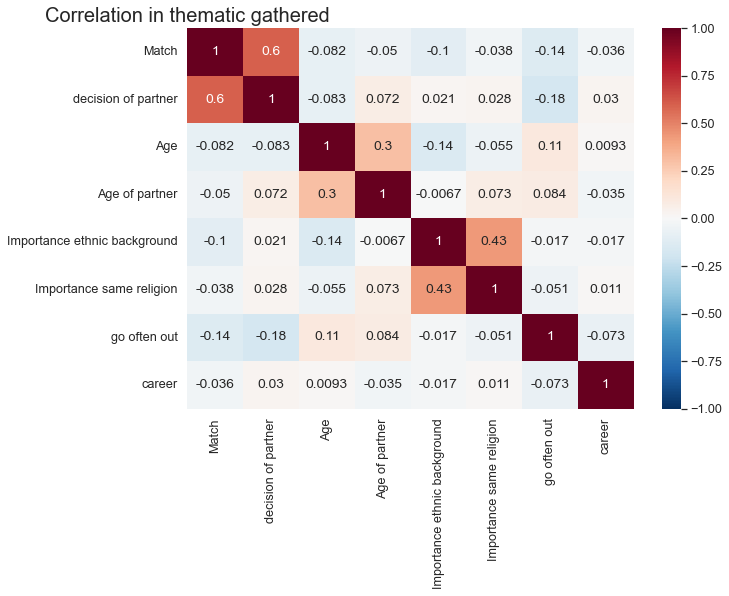

In [21]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,7))

theme = sns.heatmap(
    easy_corr.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)
theme.set_title("Correlation in thematic gathered", fontsize = 20, x = 0, y = 1)

- Only the decision of partner seems to be correlated to the match. This actually makes sense because when meeting people there is often a mutual attractiveness or mutual unattractiveness.

- There might be also some possible correlations to investigate:
    - Age and age of partner may be linked
    - Importance of ethnic background and importance of being from the same religion seem somehow related

**Let's investigate further on age, ethnic/religious background.** 

**Goals, centers of interests will be also looked at to nderstand what triggers a match.**

# 4- Further investigations on age and ethnic/religious background

## 4-1- Analysis on age

- It seems to be a correlation between age and age of partner; let's have a look

In [22]:
# checking rate of completeness of the data
cleaning.loc['age']["status"]

'rate_ok'

In [23]:
# Aggregating at person level
age = df.groupby("iid")["age", "gender"].mean()
age = age.reset_index()
#Creating a column with men/women (instead 1/0) to ease the reading
age["M/W"] = age['gender'].apply(lambda x : "Men" if x == 1 else "Women") 

C:\Users\elisa\AppData\Local\Temp\ipykernel_10776\2137260213.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [24]:
age_fig = px.violin(
                age, 
                y=age["age"], 
                title = "Age of participants by gender", 
                color="M/W", 
                width=600, 
                color_discrete_sequence= ["red", "blue"], 
                labels = {"age": "Age of attendies"}
                )

age_fig.show()

- The largest group is in mid twenties to early thirties (men slightly older than women, but not significant), so the sample is not representative of the whole population.
- This explains the correlation between age and age of partner: since the biggest population is of same age, the match will be with the attendies being all of almost the same age.

## 4-2 Ethnic and religious background

### 4-2-1 Ethnic background

- Is it important to the attendies to have the same ethnic background?

In [25]:
# checking rate of completeness of the data
cleaning.loc['imprace']["status"]

'rate_ok'

In [26]:
# picking the columns and aggregating at person level
ethnic_dict = {"imprace" : "mean", "match" : "sum"}
ethnic = df.groupby("iid").agg(ethnic_dict).reset_index()
# adding a flag for match
ethnic["at_least_1_match"] = ethnic["match"].apply(lambda x : 0 if x == 0 else 1)

In [27]:
# attendies who had a match:
ethnic_match = ethnic[ethnic['at_least_1_match'] == 1]
# attendies who had no match
ethnic_no_match = ethnic[ethnic['at_least_1_match'] < 1]

In [28]:
ethnic_fig = make_subplots(rows = 2, cols = 1)

trace0 = go.Violin(x = ethnic_match['imprace'], name = "Had at least 1 match", marker_color='green')
trace1 = go.Violin(x = ethnic_no_match['imprace'], name = "Did not have a match", marker_color='grey')

ethnic_fig.append_trace(trace0, 1, 1)
ethnic_fig.append_trace(trace1, 2, 1)

ethnic_fig.update_layout(
    autosize=False,
    height=600,
    title="Importance of ethnic background for attendies"
    )
ethnic_fig.update_xaxes(title_text="Importance of ethnic background", row=1, col=1)
ethnic_fig.update_xaxes(title_text="Importance of ethnic background", row=2, col=1)
ethnic_fig.update_yaxes(title_text="Attendies who had a match", row=1, col=1)
ethnic_fig.update_yaxes(title_text="Attendies who did NOT have a match", row=2, col=1)

ethnic_fig.show()

- Being of same ethnic background is **said** being of low importance in general. There seems to be some more expectations on this matter for people who did not have a match.
- let's check if ethnic background has indeed no influence on matches by picking columns match and "samerace"

In [29]:
# checking rate of completeness of the data
cleaning.loc['samerace']["status"]

'rate_ok'

In [30]:
# icking columns
df_ethnic_deeper = df[["match", "samerace"]]
# renaming columns
df_ethnic_name = df_ethnic_deeper.rename(columns = {'match' : 'Match', 
                                        'samerace' : 'both participants were the same ethnic background'
                                        })

Text(0, 1, 'Correlation match/ same ethnic background')

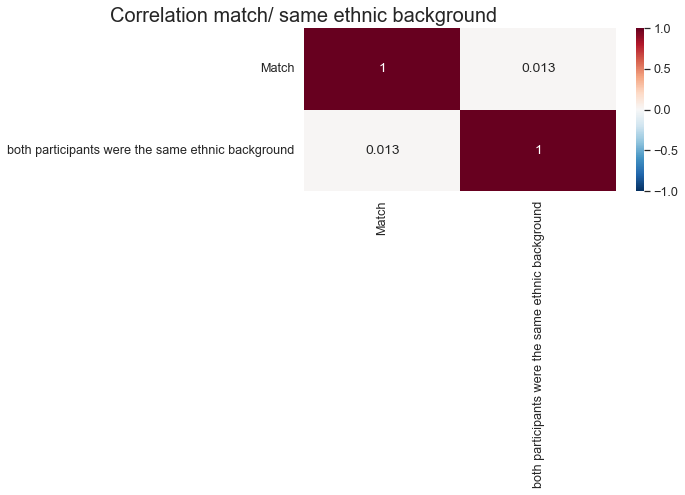

In [31]:
sns.set(font_scale=1.15)
plt.figure(figsize=(7,3))


same_eth = sns.heatmap(
    df_ethnic_name.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)
same_eth.set_title("Correlation match/ same ethnic background", fontsize = 20, x = 0, y = 1)

- Indeed it seems not to be any correlation being match and ethnic background.

### 4-2-2 Religious background

- Is religious background important for the attendies and to match?

In [32]:
# checking rate of completeness of the data
cleaning.loc['imprelig']["status"]

'rate_ok'

In [33]:
# Picking and aggregating at person level; 
rel_dict = {"imprelig" : "mean", "match" : "sum"}
rel = df.groupby("iid").agg(rel_dict).reset_index()
# adding a flag for match
rel["at_least_1_match"] = rel["match"].apply(lambda x : 0 if x == 0 else 1)

In [34]:
# Attendies who had a match
rel_no_match = rel[rel['at_least_1_match'] < 1]
# attendies who had a match:
rel_match = rel[rel['at_least_1_match'] == 1]

In [35]:
rel_fig = make_subplots(rows = 2, cols = 1)

trace0 = go.Histogram(x = rel_match['imprelig'], name = "Had at least 1 match", marker_color='green')
trace1 = go.Histogram(x = rel_no_match['imprelig'], name = "Did not have a match", marker_color='grey')

rel_fig.append_trace(trace0, 1, 1)
rel_fig.append_trace(trace1, 2, 1)

rel_fig.update_layout(
    autosize=False,
    height=600,
    title="Importance of religious background for attendies"
    )
rel_fig.update_xaxes(title_text="Importance of religious background", row=1, col=1)
rel_fig.update_xaxes(title_text="Importance of religious background", row=2, col=1)
rel_fig.update_yaxes(title_text="Attendies who had a match", row=1, col=1)
rel_fig.update_yaxes(title_text="Attendies who did NOT have a match", row=2, col=1)

rel_fig.show()

- Religious background does not seem to be an important trigger to match since both charts (people having/ not having match) look the same

### 4-2-3 Combination ethnic and religious background

- As seen earlier there seem to be a correlation between importance of ethnic and religious background. 
- Let's see if there is any over-representation of any of the ethnic background and if the correlation between ethnic and religious background has the same importance for all ethnies.

In [36]:
# Completeness of data has been checked above
# Picking columns and aggregating at person level
eth_rel_dict = {"match" : "sum", "race" : "mean",  "imprace" : "mean",  "imprelig" : "mean"}
eth_rel = df.groupby("iid").agg(eth_rel_dict).reset_index()
# adding a flag for match
eth_rel["at_least_1_match"] = eth_rel["match"].apply(lambda x : 0 if x == 0 else 1)
# filtering on people who had a match
eth_rel = eth_rel[eth_rel["match"] >0]

In [37]:
# renaming ethnic background in a new column to make it easier to read
eth_rel["ethnic_label"]= eth_rel["race"].apply(lambda x : "Black/African Am." if x == 1
                                           else "European/Caucasian-Am." if x == 2
                                           else "Latino/Hispanic Am." if x == 3
                                            else "Asian/Pacific Isl./Asian-Am." if x == 4
                                            else "Native Am." if x == 5
                                            else "other")

- Weight of ethnic backgrounds

In [38]:
# counting people of each ethnic background
ethnic_graph = eth_rel.groupby("ethnic_label")['iid'].count()

In [39]:
ethnic_pie = px.pie(ethnic_graph, 
                   values = ethnic_graph,
                   names = ethnic_graph.index,
                   title = "Weight of ethnic backgrounds",
                   color_discrete_sequence= px.colors.sequential.Viridis,
                   )
ethnic_pie.update_layout(
    autosize=False,
    height=600)

ethnic_pie.show()

- European/Caucasian American are over-represented. Let's see then the correlation between importance of ethinc and religious background by ethnic group

In [40]:
labels = ["Black/African Am.", "European/Caucasian-Am.", "Latino/Hispanic Am.", "Asian/Pacific Isl./Asian-Am.", "Native Am.", "other"]

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

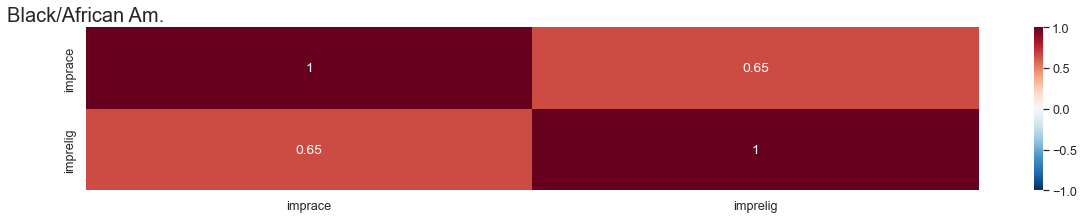

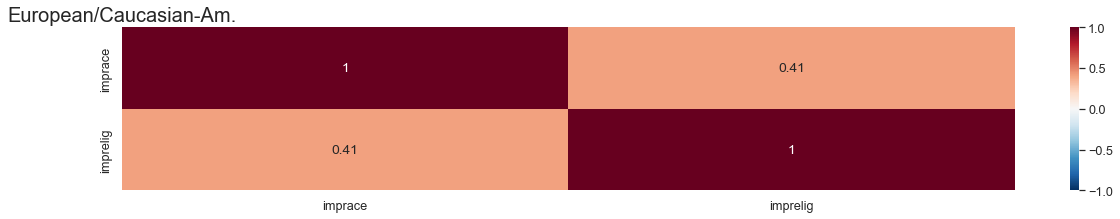

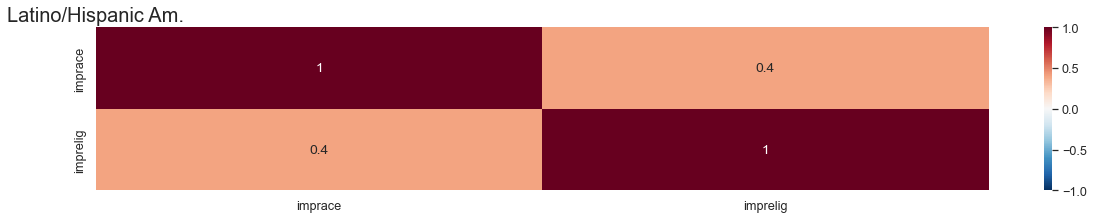

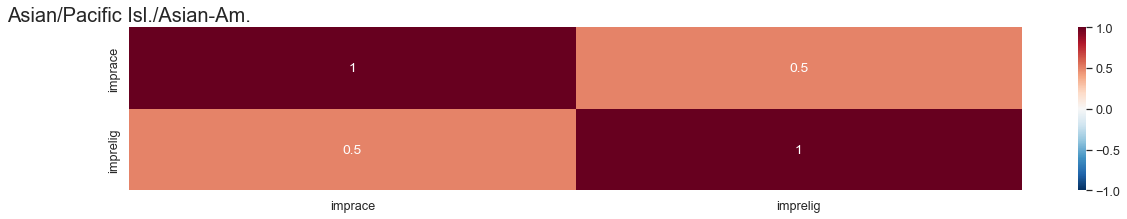

In [41]:
i=1

for i in range(1, len(labels)-1): # starting 1 to get rid of "other, finishing -1 to avoid showing "Native Am." that are not represented in the pie above
    
    # initialize plot
    fig = sns.set(font_scale=1.15)
    plt.figure(figsize=(20,3))

    # display to force all charts to be showed
    display(sns.heatmap( eth_rel[eth_rel["race"] == i][["imprace", "imprelig"]].corr(),        
            cmap='RdBu_r', 
            annot=True,
            vmin=-1, vmax=1))
    
    # title of each chart
    plt.title(labels[i-1], fontsize = 20, x=0, y=1) 
    i+=1

- if religious background is important for a person, then ethnic background will be too. 

- This is true for all the ethnic backgrounds, and even more important for Afro Americans. Would be thus interesting to gather the level of importance of religion for users and push the profiles of people of the same religion/ethnic group for people who rated religion as important.

# 5- What are people looking for?

- There seems to be a correlation between match and decision of partner on the day of the event. This makes sense because (un)attractiveness is often mutual.
- Let's then explore what the attendies are looking for to understandtry to understand their mindset.

## 5-1 what is the goal of attendies?

- Main goals have been gathered through the questionnaire; let's have a look at the ratings

In [42]:
# checking rate of completeness of the data
cleaning.loc['goal']["status"]

'rate_ok'

In [43]:
#Aggregation at person level
goal_dict = {"goal" : "mean", "match" : "sum"}
goal = df.groupby("iid").agg(goal_dict).reset_index()
# adding a flag for match
goal["at_least_1_match"] = goal["match"].apply(lambda x : 0 if x == 0 else 1)

In [44]:
# naming goals properly
goal["goal_label"]= goal["goal"].apply(lambda x : "Fun night out" if x == 1
                                       else "Meet new people" if x == 2
                                       else "Get a date" if x == 3
                                        else "Serious relationship" if x == 4
                                        else "Say I did it" if x == 5
                                        else "Other" if x == 6
                                        else "NA")
# supressing previous col "goal" coded
goal = goal.drop(columns = ["goal"])
goal.head()

,iid,match,at_least_1_match,goal_label
0,1,4,1,Meet new people
1,2,2,1,Fun night out
2,3,0,0,Other
3,4,2,1,Fun night out
4,5,2,1,Meet new people


- Goals of attendies who did not have any match

In [45]:
# attendies who did not have any match:
goal_no_match = goal[goal['at_least_1_match'] == 0]

In [46]:
# Goal of attendies who did not have any match:
goal_no_match_graph = goal_no_match.groupby("goal_label")['iid'].count()
sorted_goal_no_match_graph = goal_no_match_graph.sort_values( ascending = True)
sorted_goal_no_match_graph

goal_label
NA                       1
Serious relationship     3
Get a date               4
Say I did it             8
Other                   12
Meet new people         35
Fun night out           36
Name: iid, dtype: int64

In [47]:
# Calculating repartition of attendies who did not match:
# Total number of elements gathered
tot_no_match = sorted_goal_no_match_graph.iloc[1:].sum() #[1:] = dropping NA
# share of each element:
repartition_no_match = [round(element/tot_no_match*100,2) for element in sorted_goal_no_match_graph[1:]]

- Goals of attendies who had at least 1 match

In [48]:
# attendies who had at least 1 match:
goal_match = goal[goal['at_least_1_match'] == 1]

In [49]:
goal_graph_match = goal_match.groupby("goal_label")['iid'].count()
sorted_goal_match_graph = goal_graph_match.sort_values( ascending = True)
sorted_goal_match_graph

goal_label
NA                        6
Other                    18
Serious relationship     19
Say I did it             27
Get a date               36
Meet new people         154
Fun night out           192
Name: iid, dtype: int64

In [50]:
# Calculating repartition of attendies who had a match:
# Total number of elements gathered
tot_match = sorted_goal_match_graph.iloc[1:].sum() #[1:] = dropping NA
# share of each element:
repartition_match = [round(element_match/tot_match*100,2) for element_match in sorted_goal_match_graph[1:]]

In [51]:
data_for_graph =  {"Attendies who did not match": repartition_no_match, 
        "Had at least 1 match" : repartition_match
        }

graph_df = pd.DataFrame(data_for_graph,columns=['Attendies who did not match','Had at least 1 match'], index = [sorted_goal_match_graph.index[1:][i] for i in range(len(repartition_match) )])

In [52]:
goal_fig = go.Figure()
goal_fig.add_trace(
    go.Bar(
        x=graph_df["Attendies who did not match"], 
        y=graph_df.index, 
        orientation="h", 
        text = graph_df["Attendies who did not match"],
        name="Attendies who did not match",
        marker_color = "grey"
    )
)
goal_fig.add_trace(
    go.Bar(
        x=graph_df["Had at least 1 match"],
        y=graph_df.index,
        orientation="h",
        text = graph_df["Had at least 1 match"],
        name="Had at least 1 match",
        marker_color = "green"
    )
)
goal_fig.update_layout(
    barmode="group", 
    xaxis_title="%", yaxis_title="Goal of attendies",
    autosize=False,
    height=600,
    title="Goal of attendies"
)

goal_fig.show()

- Attendies are primarily looking for fun and meeting new people, both for people who had a match and who had not

- Since participants are looking for casualness, let's have a look at their centers of interest

## 5-2 Centers of interests

- Is there any overlap in the interests between genders?

In [53]:
# checking rate of completeness of the data
cleaning.loc['sports':'yoga']["status"]

sports      rate_ok
tvsports    rate_ok
exercise    rate_ok
dining      rate_ok
museums     rate_ok
art         rate_ok
hiking      rate_ok
gaming      rate_ok
clubbing    rate_ok
reading     rate_ok
tv          rate_ok
theater     rate_ok
movies      rate_ok
concerts    rate_ok
music       rate_ok
shopping    rate_ok
yoga        rate_ok
Name: status, dtype: object

In [54]:
# picking columns from dataset
interests = pd.concat([df.loc[:,'iid':'gender'], df.loc[:,'sports':'yoga']], axis = 1)

In [55]:
# Aggregating at person level
inter_dict = {"sports" : "mean", 
            "tvsports" : "mean", 
            "exercise" : "mean", 
            "dining" : "mean", 
            "museums" : "mean", 
            "art" : "mean", 
            "hiking" : "mean",
            "gaming" : "mean", 
            "clubbing" : "mean", 
            "reading" : "mean", 
            "tv" : "mean", 
            "theater" : "mean", 
            "movies" : "mean", 
            "concerts" : "mean", 
            "music" : "mean", 
            "shopping" : "mean", 
            "yoga" : "mean",
            "gender" : "mean"}
inter = interests.groupby("iid").agg(inter_dict).reset_index()
# Adding 1 columns men/women to ease reading
inter["M/W"] = inter['gender'].apply(lambda x : "Men" if x == 1 else "Women")

In [56]:
# Splitting in 2 dataframe to prepare pairplot, to keep data readable
inter1 = pd.concat([inter.loc[:,'sports':'gaming'], inter.loc[:,'M/W']], axis = 1)
inter2 = pd.concat([inter.loc[:,'clubbing':'yoga'], inter.loc[:,'M/W']], axis = 1)

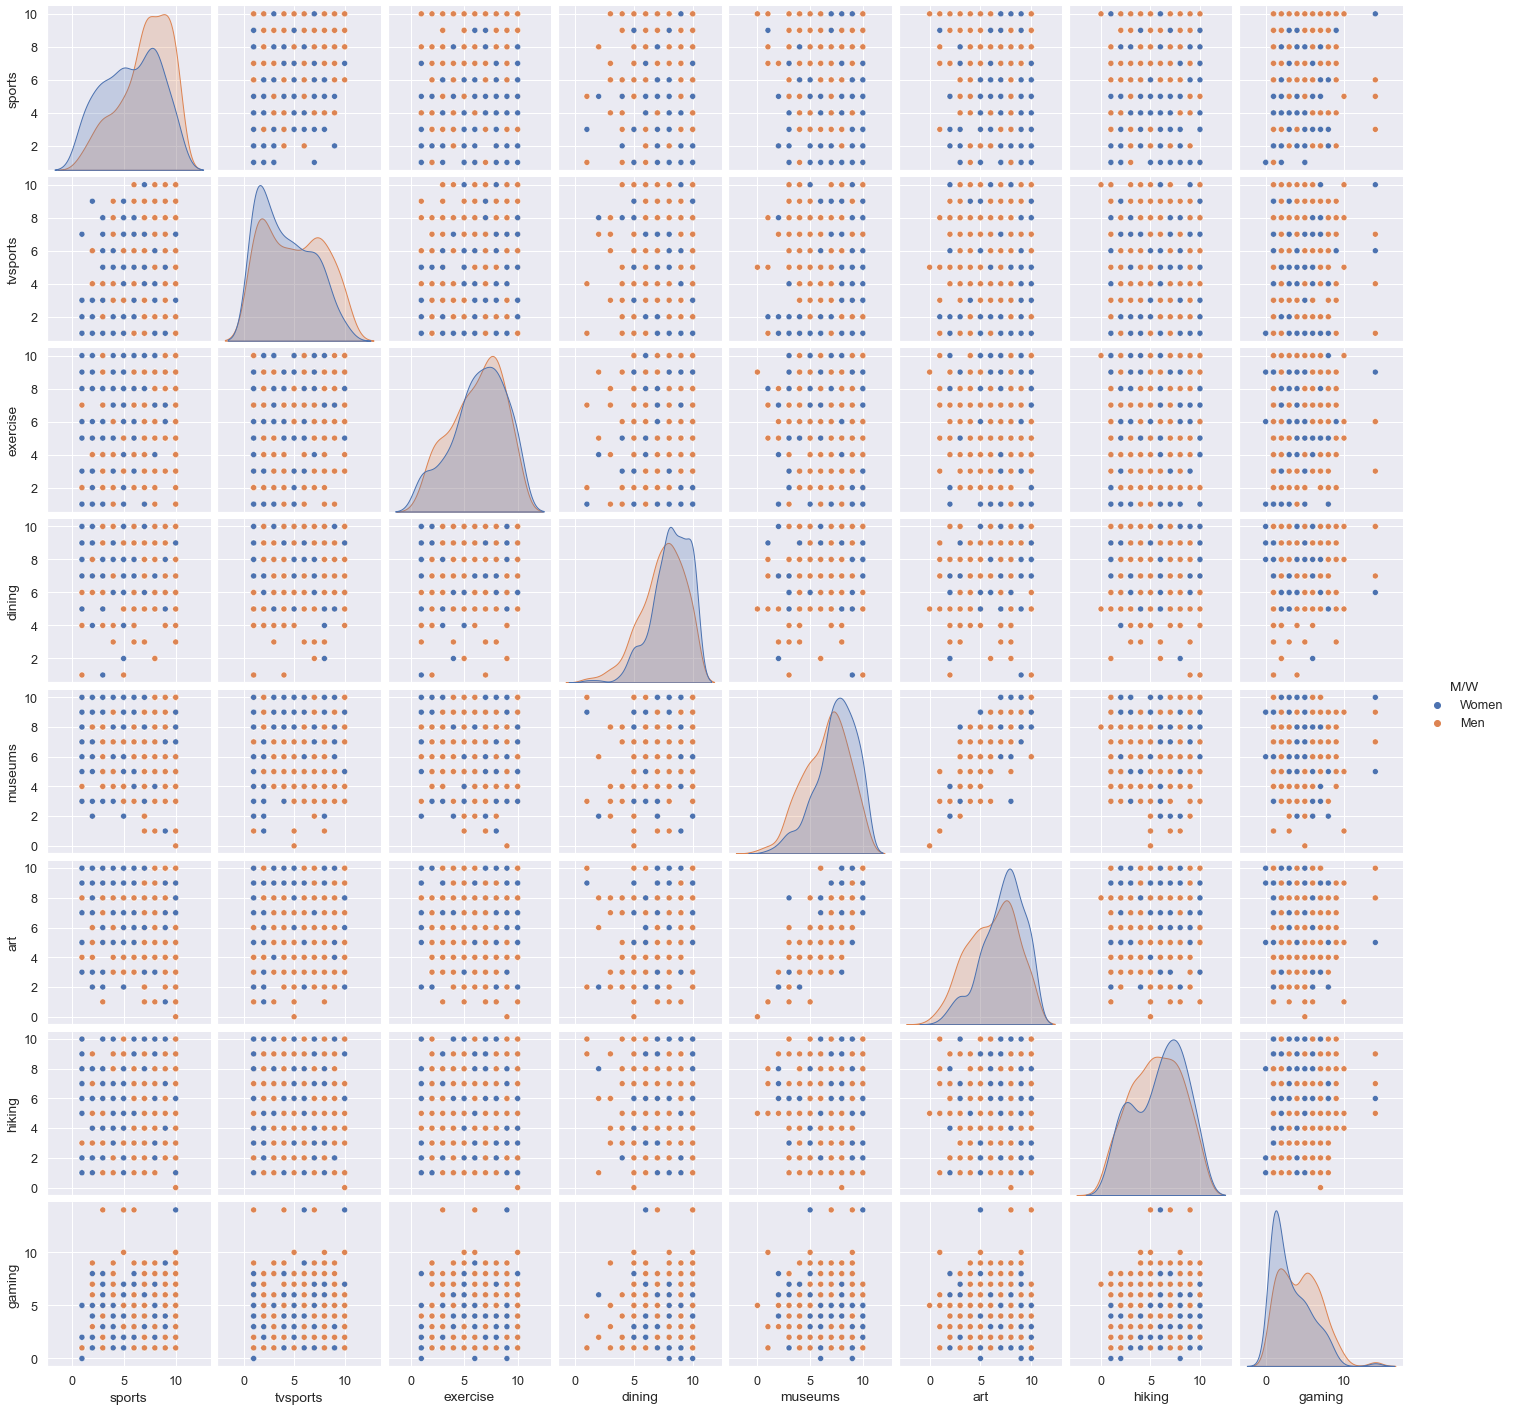

In [57]:
sns.pairplot(inter1, hue="M/W")

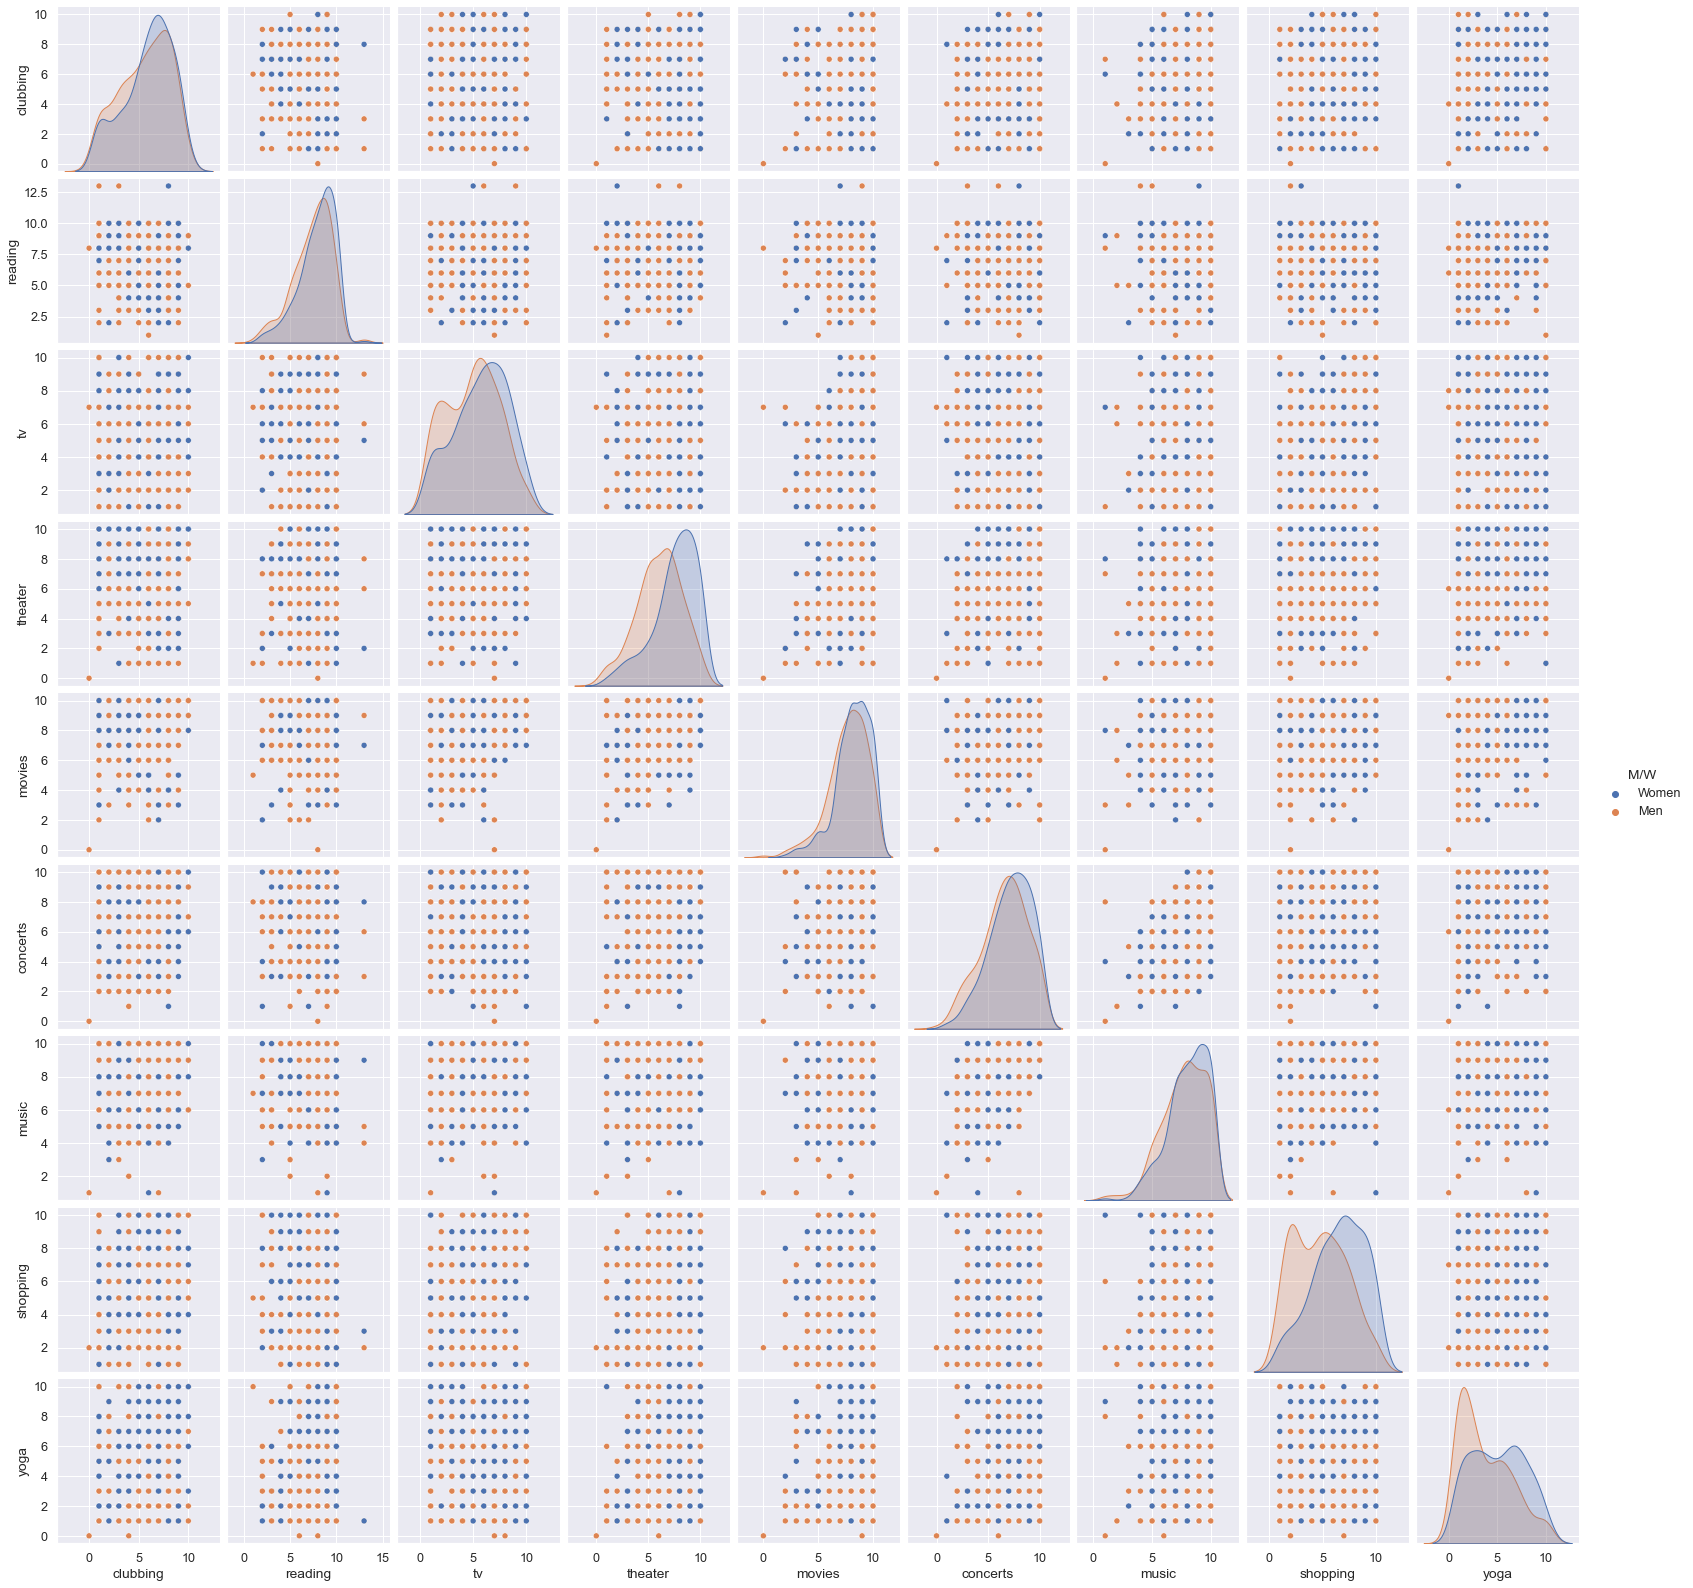

In [58]:
sns.pairplot(inter2, hue="M/W")

- Looking at the interest overlap between genders, looks like both genders are likely to enjoy dining, reading, movies, concerts and music

- Sports (incl TV sports and exercise), Musem/art/theatre, Hiking/ gaming,  and primarily shopping and yoga show non overlapping distribution; 

these activities would probably require that profiles having the same centers of interest are pushed to them.

## 5-3 Expectations and self measure

## 5-3-1 Expectations

- Do men and women have the same expectations? 

In [59]:
# checking rate of completeness of the data
cleaning.loc['attr1_1':'shar1_1']["status"]

attr1_1     rate_ok
sinc1_1     rate_ok
intel1_1    rate_ok
fun1_1      rate_ok
amb1_1      rate_ok
shar1_1     rate_ok
Name: status, dtype: object

In [60]:
# picking columns from dataset
look_for = pd.concat([df.loc[:,'iid':'gender'], df.loc[:,'match'], df.loc[:,'attr1_1':'shar1_1']], axis = 1)

In [61]:
# aggregating at person level
look_dict = {"attr1_1" : "mean", 
            "sinc1_1" : "mean", 
            "intel1_1" : "mean", 
            "fun1_1" : "mean", 
            "amb1_1" : "mean", 
            "shar1_1" : "mean",
            "match" : "sum", 
            "gender" : "mean"}
look = look_for.groupby("iid").agg(look_dict).reset_index()
# Adding column 'at least 1 match'
look["at_least_1_match"] = look["match"].apply(lambda x : 0 if x == 0 else 1)
# Adding column men/women to make it easier to read
look["M/W"] = look['gender'].apply(lambda x : "Men" if x == 1 else "Women")

In [62]:
# Splitting into 2 lines: men/ women
look_for_gender = look[['M/W','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('M/W').mean()
# Adding names to columns
columns_look_for = ['Attractiveness','Sincerity','Intelligence','Fun','Ambition','Shared Interests']
look_for_gender.columns = columns_look_for

In [63]:
look_for_gender

,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests
M/W,,,,,,
Men,27.248800,16.37960,19.387418,17.600839,8.823956,10.982271
Women,18.020372,18.22223,20.971004,17.299108,12.818476,12.697836


- What are men looking for?

In [64]:
look_for_men = look_for_gender.loc["Men", :] 
sorted_look_for_men = look_for_men.sort_values( ascending = True)
sorted_look_for_men 

Ambition             8.823956
Shared Interests    10.982271
Sincerity           16.379600
Fun                 17.600839
Intelligence        19.387418
Attractiveness      27.248800
Name: Men, dtype: float64

- Whate are women looking for?

In [65]:
look_for_women = look_for_gender.loc["Women", :] 
sorted_look_for_women = look_for_women.sort_values( ascending = True)
sorted_look_for_women 

Shared Interests    12.697836
Ambition            12.818476
Fun                 17.299108
Attractiveness      18.020372
Sincerity           18.222230
Intelligence        20.971004
Name: Women, dtype: float64

- This will be put in a chart together with self measure on the same criterias

### 5-3-2 How do people mesure themselves on these criterias?

- How do men and women measure themselves on these criterias?

In [66]:
# checking rate of completeness of the data
cleaning.loc['attr3_1':'amb3_1']["status"]

attr3_1     rate_ok
sinc3_1     rate_ok
fun3_1      rate_ok
intel3_1    rate_ok
amb3_1      rate_ok
Name: status, dtype: object

In [67]:
# picking columns from dataset
self_measure = pd.concat([df.loc[:,'iid':'gender'], df.loc[:,'match'], df.loc[:,'attr3_1':'amb3_1']], axis = 1)

In [68]:
# Aggregating at person level
self_dict = {"attr3_1" : "mean", 
            "sinc3_1" : "mean", 
            "intel3_1" : "mean", 
            "fun3_1" : "mean", 
            "amb3_1" : "mean", 
            "match" : "sum", 
            "gender" : "mean"}
selfm = self_measure.groupby("iid").agg(self_dict).reset_index()
# Adding column 'at least 1 match'
selfm["at_least_1_match"] = selfm["match"].apply(lambda x : 0 if x == 0 else 1)
# Adding column men/women to make it easier to read
selfm["M/W"] = selfm['gender'].apply(lambda x : "Men" if x == 1 else "Women")

In [69]:
# Splitting into 2 lines: men/ women
selfm_gender = selfm[['M/W','attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].groupby('M/W').mean()
# Adding names to columns
columns_selfm = ['Attractiveness','Sincerity','Intelligence','Fun','Ambition']
selfm_gender.columns = columns_selfm

In [70]:
selfm_gender

,Attractiveness,Sincerity,Intelligence,Fun,Ambition
M/W,,,,,
Men,6.945255,8.105839,8.474453,7.507299,7.525547
Women,7.242537,8.470149,8.294776,7.899254,7.630597


- How do women measure themselves?

In [71]:
selfm_gender.loc["Women"]

Attractiveness    7.242537
Sincerity         8.470149
Intelligence      8.294776
Fun               7.899254
Ambition          7.630597
Name: Women, dtype: float64

- How do men measure themselves?

In [72]:
selfm_gender.loc["Men"]

Attractiveness    6.945255
Sincerity         8.105839
Intelligence      8.474453
Fun               7.507299
Ambition          7.525547
Name: Men, dtype: float64

In [73]:
# Defining colors
colors_bar = ['lightsalmon'] *5
colors_bar[1] = 'crimson'

# Plot:
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.3, 0.6],
    row_heights=[0.5],
    subplot_titles=("Men's expectations",
                    "Women's self measure"),
    specs=[[ {"type": "pie"}, {"type": "bar"}]])

fig.add_trace(go.Pie(
    labels=sorted_look_for_men.index, 
    values=sorted_look_for_men ,
    textinfo='percent+label',
    title = "Men's expect.", 
    marker_colors=px.colors.sequential.Darkmint,
    pull=[0, 0, 0, 0, 0, 0.2],
    hole = 0.7,
    showlegend=False),
    row=1, col=1)

fig.add_trace(go.Bar(
    x=columns_selfm,
    y=selfm_gender.loc["Women"],
    marker_color = colors_bar,
    showlegend=False), 
    row=1, col=2)

fig.update_layout(
    title_text="Men's expectations vs self measure of women")

fig.show()


In [74]:
colors_bar = ['steelblue'] *5
colors_bar[1] = 'navy'

fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.3, 0.6],
    row_heights=[0.5],
    subplot_titles=("Women's expectations",
                    "Men's self measure"),
    specs=[[ {"type": "pie"}, {"type": "bar"}]])

fig.add_trace(go.Pie(
    labels=sorted_look_for_women.index, 
    values=sorted_look_for_women,
    textinfo='percent+label',
    title = "Women's expect.", 
    marker_colors=px.colors.sequential.Reds,
    pull=[0, 0, 0, 0, 0, 0.2],
    hole = 0.7,
    showlegend=False),
    row=1, col=1)

fig.add_trace(go.Bar(
    x=columns_selfm,
    y=selfm_gender.loc["Women"],
    marker_color = colors_bar,
    showlegend=False), 
    row=1, col=2)

fig.update_layout(
    title_text="Women's expectations vs self measure of men")

fig.show()

- Women are looking for intelligence and sincerity (to a lower extent); both criterias are highly rated in the self measure from men.
- However men are looking for attractiveness, which has the lowest scoring of women's self measure. Does that mean self measure does not reflect reality?

- let's conduct the analysis based on same criterias but with category "how do you think other perceive you"

## 5-4 Women's perception from others

- One of the elements gathered is "how do you think others perceive you". Let"s use this to go ahead.

In [75]:
# Checking completeness of data to pick
cleaning.loc['attr5_1':'amb5_1']

,nb missing values,nb populated data,% missing values,status,data_key,collect_date
attr5_1,3472,4906,41.441872,low_rate,attr5_1,on_spot
sinc5_1,3472,4906,41.441872,low_rate,sinc5_1,on_spot
intel5_1,3472,4906,41.441872,low_rate,intel5_1,on_spot
fun5_1,3472,4906,41.441872,low_rate,fun5_1,on_spot
amb5_1,3472,4906,41.441872,low_rate,amb5_1,on_spot


- **Elements on perception from others have a low completion rate, so conclusion may be partial**

In [76]:
# picking columns from dataset
perception = pd.concat([df.loc[:,'iid':'gender'], df.loc[:,'match'], df.loc[:,'attr5_1':'amb5_1']], axis = 1)

In [77]:
# Aggregation at peron level
perception_dict = {"attr5_1" : "mean", 
                "sinc5_1" : "mean", 
                "intel5_1" : "mean", 
                "fun5_1" : "mean", 
                "amb5_1" : "mean", 
                "match" : "sum", 
                "gender" : "mean"}
percep = perception.groupby("iid").agg(perception_dict).reset_index()
# Adding a column 'at least 1 match
percep["at_least_1_match"] = percep["match"].apply(lambda x : 0 if x == 0 else 1)
# adding a column men/women to make it more readable
percep["M/W"] = percep['gender'].apply(lambda x : "Men" if x == 1 else "Women")
# Creating a mask for peaople who had at least 1 match
percep_match = percep[percep['at_least_1_match'] == 1]

In [78]:
# Splitting into 2 lines: men/ women
percep_match_gender = percep[['M/W','attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1']].groupby('M/W').mean()
# Naming columns
columns_percep_match = ['Attractiveness','Sincerity','Intelligence','Fun','Ambition']
percep_match_gender.columns = columns_percep_match
percep_match_gender

,Attractiveness,Sincerity,Intelligence,Fun,Ambition
M/W,,,,,
Men,6.805031,7.729560,8.308176,7.289308,7.440252
Women,7.058065,8.141935,8.206452,7.483871,7.767742


In [79]:
# How do women declare that other's perceive them:
percep_match_gender.loc["Women"]

Attractiveness    7.058065
Sincerity         8.141935
Intelligence      8.206452
Fun               7.483871
Ambition          7.767742
Name: Women, dtype: float64

In [80]:
# to be compared to self measure of women, derived from above in the notebook:
selfm_gender.loc["Women"]

Attractiveness    7.242537
Sincerity         8.470149
Intelligence      8.294776
Fun               7.899254
Ambition          7.630597
Name: Women, dtype: float64

In [81]:
# and to self measure of women who had a match:

# self measure of women as a whole:
selfm_match = selfm[selfm['at_least_1_match'] == 1]

# filtered on women:
selfm_match_gender = selfm_match[['M/W','attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].groupby('M/W').mean()
columns_selfm = ['Attractiveness','Sincerity','Intelligence','Fun','Ambition']
selfm_match_gender.columns = columns_selfm

selfm_match_gender.loc["Women"]

Attractiveness    7.254630
Sincerity         8.500000
Intelligence      8.282407
Fun               7.893519
Ambition          7.560185
Name: Women, dtype: float64

In [82]:
fig = go.Figure(data=[
    go.Bar(name='Women, self perception', x=columns_selfm, y= selfm_gender.loc["Women"], marker_color='lightsalmon'),
    go.Bar(name="Women who had a match, self perception", x=columns_selfm, y=selfm_match_gender.loc["Women"]),
    go.Bar(name="Women who had a match, perception from others", x=columns_selfm, y=percep_match_gender.loc["Women"], marker_color='crimson')
])

fig.update_layout(barmode='group', title_text="Women's ratings")
fig.show()

- No major change in the scoring of these 3 sets of data (and also carreful with the perception from others, having a low completion rate)
All in all, the scorings do not drastically differ by criterias, so not sure any conclusion can be made on this. 

- Men do match more than women though their expectations are less fulfilled;
    - Maybe men perceive women better than they rate themselves
    - Maybe men are more looking for casualness and thus match easier
    - Maybe also the important number of questions generates a lower accuracy in the answers at a certain point

# Conclusion

## What are the triggers to match?

Only 16% of the meets generate a match... But 82% of the attendies did match at least once. 
45% of the attendies did match only once or twice, which shows some selection in the matches.

Several factors are counting to generate a match:

- Age vs age of partner and importance of religious/ethnic background were explored more in details, since they seem to show some correlation:

        1-The age distribution of the sample is not representative of the entire population as it concentrates on mid 20/mid 30 only. So, the correlation on age has been left out. The commercial target of the plateform is maybe on this age (to be confirmed by the person who provided us with the dataset).

        2-Ethnic background and being of the same religion does not seem to be drivers as such.

        However if religious background is important for a person, then ethnic background will be too.

        This is true for all the ethnic groups, and even more important for Afro Americans. Would be thus interesting to gather the level of importance of religion for users and push the profiles of people of the same religion/ethny who rated religion as important.


- Match vs match of partner show some correlation. This makes sense because when meeting people there is often a mutual attractiveness or mutual unattractiveness. To go further on this, goals of people, centers of interests and expectations of participants have been investigated:

        1- Casualness (having a fun night and meet people) is definitly a key drivers of the attendies.

        The pages of the platform could be reshaped to bring fun, there could be a competition on the funniest profile picture maybe (winners would get free hours of use of the platform for example).

        The platform could also claim that the aim is not only to date people but also to meet new people.

        2- Some of the interests can be really dividing (yoga, shopping or sport).

        Knowing this, would be very interesting to push first the profiles with similar centers of interests, especially the ones that are really specific by gender (eg yoga, shopping, sport, gaming).

        3- About the comparison between expectations and self measure, women's expectations seem to be more fulfilled than the ones of men. Carreful though on this conclusion since it is a self rating and some of the data have a low compleness. 
        Probably the attendies may have felt some redoundancy while feeding the questionnaire and may have answered less accurately at a certain point, or not fed the questionnaire.


## How to increase number of matches?
Recommandations:
- Reshape the pages of the platform to bring fun and casualness, organize a competition on the funniest profile picture. 
- The plateform could claim that the aim is not only to date people but also to meet new people.
- About hobbies, as some themes are dividing, the profiles with themes like art / yoga/ shopping / gaming should be pushed first to the opposite gender who like the same themes.
- Same for people who flag religion as being important.
- Finally organizing events in real life, focused on fun, and dedicated to users with a minimum number of matches could be a good way to increase the number of matches, making the platform more popular, increase the number of users.